# TMA4215 - Assignment 5 - From modules 4 and 5

**Deadline:** Thursday November 12, 11:59PM

**For approval:** Upload a Jupyter Notebook, a pdf-file, or a scan/photo of readable handwriting in Blackboard with all calculations and answers. Answer Control questions in Blackboard.

**Problem 1.** (Module 4)
We define the function $f:\mathbb{R}^2\rightarrow\mathbb{R}$
$$
f(x,y) = y^4 + 3y^2 - 4xy - 2y + x^2
$$

**(a)** Find all the (real) stationary points of $f$ and determine all its local or global minima. Check in particular whether the Hessian is SPD at the stationary point(s).

**ANSWER:**

($\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}) = (0,0)$ gives one stationary point, $x = 2$ and $y = 1$.
The Hessian of $f$ becomes 
$$
H(y) = \begin{pmatrix}
2 & -4\\
-4 & 12y^2 + 6
\end{pmatrix}
$$

Hence, at the stationary point, $x^TH(1)x = 2(x_1 -x_2)^2 + 16x_2^2 >0$ for a nonzero vector $x = (x_1, x_2)^T$. This means that the Hessian is SPD at the stationary point, and $(2,1)$ is a local minima. Also: at $y=1$ both the trace and the determinant equal 20, so both the sum and the product of the eigenvalues are positive, hence, both eigenvalues must be positive so the Hessian is SPD at the stationary point.
In fact, the point $(2,1)$ is a global minimum since $f(x,y)\rightarrow+\infty$ as $\|(x,y)\|\rightarrow\infty$.

**Control question 1:** How many stationary points are there?

**(b)** Starting at the point $(x,y) = (0, 0)$, compute one step of the gradient descent method with backtracking (Armijo) line search.

$$
\begin{array}{l}
\text{Choose}\ \bar{\alpha}>0, \rho\in(0,1)\ c\in(0,1);\ 
\text{Set}\ \alpha\rightarrow\bar{\alpha}\\
\mathbf{repeat}\ \text{until} f(x_k+\alpha p_k)\leq f(x_k)+c\alpha\nabla f_k^Tp_k\\
\qquad\alpha\rightarrow\rho\alpha \\
\textbf{end}
\end{array}
$$

Start with an initial step length $\bar{\alpha}=1$, and use the parameters $c = 1/10$ (sufficient decrease parameter) and   $\rho=1/4$ (contraction factor). The calculations can be done either by hand or by writing a code for it.

**Control question 2:** What value of $\alpha$ is used in this first iteration?
**ANSWER:** $\alpha_1 = 0.25$

**Control question 3:** What is $(x_1,y_1)$, the next approximation.
**ANSWER:** $(x_1,y_1) = (0, 0.5)$.


**Problem 2** (Module 5) Find the natural cubic spline $S_3(x)$ on the knots $\{-1,0,1\}$ that interepolates the data $S_3(-1)=0, S_3(0)=1, S_3(1)=0$.

**ANSWER:** We find that 

$$
S_3(x) = \left\{
\begin{array}{ll}
-\frac12 x^3-\frac32 x^2 + 1 & -1\leq x < 0\\
\frac12 x^3-\frac32 x^2 + 1 & 0 \leq x \leq 1
\end{array}
\right.
$$
**Control question 4:** What is $S_3(1/2)$. 

**Control question 5:** What is $S_3'(1/2)$.



In [11]:
#Code for 1b
import numpy as np

def f(x):
    return x[1]**4 + 3*x[1]**2 - 4*x[0]*x[1] - 2*x[1] + x[0]**2

def grad_f(x):
    comp1 = -4*x[1] + 2*x[0]
    comp2 = 4*x[1]**3 + 6*x[1] - 4*x[0] - 2
    return np.array([comp1, comp2])

alpha_hat = 1
c = 1/10
rho = 1/4
def armijo(f,grad_f,x0):
    alpha = alpha_hat
    x = x0
    p = -grad_f(x)
    counter = 1
    while f(x + alpha*p) > f(x) + c*alpha*grad_f(x).T @ p:
        alpha *= rho
        x = x + alpha*p
        p = -grad_f(x)
        
        print("iteration: " + str(counter))
        print("x: ")
        print(x)
        print("alpha: " + str(alpha))
        counter += 1
    return x
        
    
    
    
x0 = np.array([0,0])
x = armijo(f,grad_f,x0)



iteration: 1
x: 
[0.  0.5]
alpha: 0.25
iteration: 2
x: 
[0.125   0.40625]
alpha: 0.0625


[[-0.5  0.5]
 [ 0.  -1.5]
 [ 1.5  0. ]
 [ 0.   1. ]]
[-1.  0.  1.]


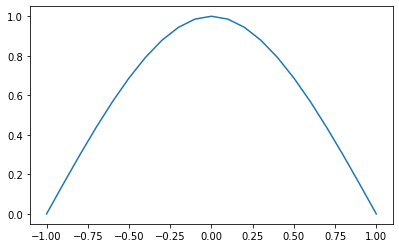

In [21]:
#Checking if the spline is correct
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt


x = np.array([-1,0,1])
y = np.array([0,1,0])

spline = interpolate.CubicSpline(x,y,bc_type = 'natural')
print(spline.c)
print(spline.x)




xs = np.arange(-1, 1.1, 0.1)
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(xs, spline(xs), label="S")
plt.show()

